# Develop model for hand written digit recognition with Keras
MNIST dataset

Keras library

I learned the model training from an excellent tutorial by Jason Brownlee at https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/ 

# Imports

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


# Preparing the data

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

11493376/11490434 [==============================] - 1s 0us/step


# Visualize the dataset

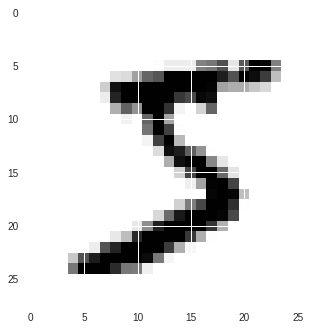

one-hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  true value: 5


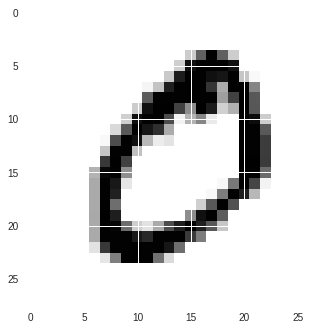

one-hot encoding:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  true value: 0


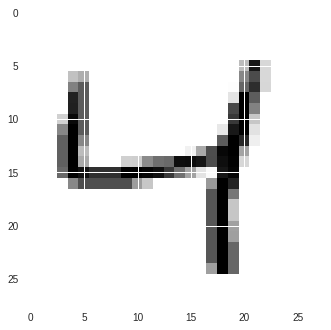

one-hot encoding:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]  true value: 4


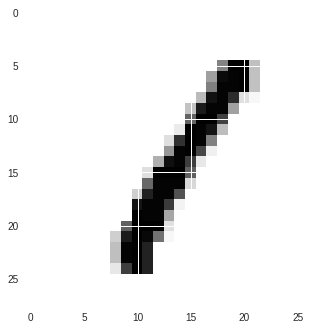

one-hot encoding:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]  true value: 1


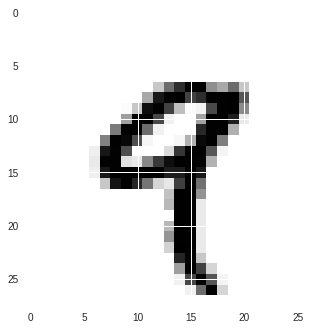

one-hot encoding:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]  true value: 9


In [38]:
import matplotlib.pyplot as plt

# plot 4 images
for i in range(5):
    # Plot image.
    plt.imshow(X_train[i].reshape([28,28]), cmap='binary')
    plt.show()
    
    # And show the correct value
    for idx, val in enumerate(y_train[i]):
      if(val==1):
        print('one-hot encoding: ', y_train[i],' correct value:',idx)

# Train

In [39]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2782 - acc: 0.9210 - val_loss: 0.1415 - val_acc: 0.9570
Epoch 2/10
 - 6s - loss: 0.1115 - acc: 0.9678 - val_loss: 0.0922 - val_acc: 0.9708
Epoch 3/10
 - 6s - loss: 0.0717 - acc: 0.9797 - val_loss: 0.0782 - val_acc: 0.9774
Epoch 4/10
 - 6s - loss: 0.0504 - acc: 0.9858 - val_loss: 0.0741 - val_acc: 0.9770
Epoch 5/10
 - 6s - loss: 0.0373 - acc: 0.9894 - val_loss: 0.0669 - val_acc: 0.9789
Epoch 6/10
 - 6s - loss: 0.0268 - acc: 0.9928 - val_loss: 0.0630 - val_acc: 0.9811
Epoch 7/10
 - 6s - loss: 0.0212 - acc: 0.9946 - val_loss: 0.0616 - val_acc: 0.9807
Epoch 8/10
 - 6s - loss: 0.0143 - acc: 0.9968 - val_loss: 0.0620 - val_acc: 0.9804
Epoch 9/10
 - 6s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0589 - val_acc: 0.9811
Epoch 10/10
 - 6s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0595 - val_acc: 0.9817


# Evaluate

In [40]:
# Evaluate the model against the test dataset
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.83%


# Save model to disk

In [0]:
!mkdir Models
!mkdir ModelJS

In [0]:
!ls -la

In [6]:
# Save Python model
model.save('Models/model.h5',overwrite=True)
print("Saved model to disk")

Saved model to disk


# Export the model
to json file that we can later use as an API

In [0]:
!pip3 install tensorflowjs

In [0]:
!tensorflowjs_converter --input_format=keras Models/model.h5 ModelJS/

Using TensorFlow backend.


In [0]:
import os
from google.colab import files

folder = 'ModelJS/'

for filename in os.listdir(folder):
  files.download('%s%s' % (folder,filename)) 
  print("download %s%s" % (folder,filename))

download ModelJS/group1-shard1of1
download ModelJS/model.json
